# Part I - Proper Loans Data Exploration
## by Koketso Mangwale

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a>
    <ul><li><a href="#structure">Data Description</a></li>
    <li><a href="#feature1">Research Questions</a></li>
    <li><a href="#feauture2">Feature Selection</a></li>    
    </ul>
</li>   
<li><a href="#uni">Univariate Exploration</a></li> 
<li><a href="#bi">Bivariate Exploration</a></li> 
<li><a href="#multi">Multivariate Exploration</a></li>     
<li><a href="#close">Conclusions</a></li> 
</ul>

<a id='intro'></a>
## Introduction
   ###### In this project we will explore and analyse the loans data from Prosper in Q4 2005 to Q1 2014  in the USA.  The dataset is made up of 113 937 loans and 81 features.
   
  

<a id='wrangle'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from wordcloud import WordCloud

%matplotlib inline

In [2]:
# Load dataset into dataframe
prosper_loans = pd.read_csv('prosperLoanData.csv')

print(prosper_loans.shape)
prosper_loans.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# dataset information
prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# number of non-unique values
prosper_loans.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [5]:
# number of duplivcate rows
prosper_loans.duplicated().sum()

0

__Check for missing values__

In [6]:
#use isnull() to assess missing data
missing_data = prosper_loans.isnull().sum()

In [7]:
missing_data.sort_values(ascending = False).head(40)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
CurrentCreditLines                

__Using the missing list above and inspecting through Excel:__
- CreditGrade and ProsperRating have missing values stored as blank. This is mostly because of the allocation to loans after July 2019. 
    - I will use ProsperRating for analysis since the feature has less blanks. 
- DebtToIncomeRatio has 8554 blanks which means the ratio is unavailable for the loan. 
- 7625 borrowers did not provide their EmploymentStatusDuration.
    - some blanks are due to employment statuses: 'Not available' or 'Not employed'

__Is the data tidy?__
- The LoanOriginationQuarter column is made up of quarter and Year. I will split the LoanOriginationQuarter into 2 columns. Quarter and Year.

In [8]:
# define function for splitting column
def splitFeature(df):
    
    #extract year in this form 'YYYY' and store in new column 'Year'
    df['Year'] = df.LoanOriginationQuarter.str.extract('(\d\d\d\d)', expand =True)
    
    #convert year to type int
    df['Year'] = df['Year'].astype(str).astype(int)
    
    #extract pattern for quarter and store in new column 'Quarter'
    df['Quarter'] =   df.LoanOriginationQuarter.str.extract('(Q[0-9]) ', expand =True)

In [9]:
#call splitFeature
splitFeature(prosper_loans)

__Rename columns__

In [10]:
# rename columns to remove spacing and '()' characters in column names
prosper_loans.rename(columns={'ListingCategory (numeric)' : 'ListingCategoryNumeric'}, inplace = True)
prosper_loans.rename(columns={'ProsperRating (Alpha)' : 'ProsperRatingAlpha'}, inplace = True)
prosper_loans.rename(columns={'ProsperRating (numeric)' : 'ProsperRatingNumeric'}, inplace = True)
prosper_loans.rename(columns={'TradesNeverDelinquent (percentage)' : 'TradesNeverDelinquentPercentage'}, inplace = True)

In [11]:
#loans summarry statistics
prosper_loans.describe().transpose().head(45)

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.000000,600554.000000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.24000,4.925000e-01
EstimatedEffectiveYield,84853.0,0.168661,0.068467,-0.18270,0.115670,0.161500,0.22430,3.199000e-01
EstimatedLoss,84853.0,0.080306,0.046764,0.00490,0.042400,0.072400,0.11200,3.660000e-01
EstimatedReturn,84853.0,0.096068,0.030403,-0.18270,0.074080,0.091700,0.11660,2.837000e-01
ProsperRatingNumeric,84853.0,4.072243,1.673227,1.00000,3.000000,4.000000,5.00000,7.000000e+00
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01


<a id='structure'></a>
### What is the structure of your dataset?

The dataset is about historic loans data from Prosper. It is made up of the borrower credit profile, location, employment, income, payment history, loan information, borrower's credit score change over time as well as loan investment information. The detailed description of each column can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

There are 113 937 loans with 81 features. There is a small amount of features that will be chosen for this analysis. Each loan observation is uniquely identified by a listing key and the date each listing was created ranges from November 9, 2005 to March 10, 2014
                          
<a id='feature1'></a>
### What is/are the main feature(s) of interest in your dataset?

__The following are the topics I am going to explore and analyse:__

Is Prosper a good lender? I will explore what influences the Annual Percentage Rate and the Prosper rating as well as the borrowers' loan affordability.

<a id='feature2'></a>
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will explore the 3 continuous , 4 discrete, and 6 categorical features(EmploymentStatus-Nominal, ProsperRating (Alpha)*Which of them are ordinal and which are nominal?*
    
   - `BorrowerAPR`: The borrower's Annual Percentage Rate(APR) or the loan. 
   - `BorrowerRate`: The borrower's interest rate
   - `DebtToIncomeRatio`: Borrower's debt to income (DTI) ratio capped at 10.01(percentage ratio).  </br>
   
   - `ProsperScore`: Risk score ranging from 1 -10. Allocated to loans after July 2019. 
   - `Term`: The length of the loan in months at the time of listing.
   - `EmploymentStatusDuration`: The length of the employment status at the time of listing in months.
   - `StatedMonthlyIncome`: Borrower monthly income at the time of listing.  </br>
 
   - `CreditGrade`: Credit rating allocated to loans after July 2019. Hence the 84984 missing values. 
       - This is a categorical feature which assumes 'AA','A','B','C','D','E' or 'HR' values.
   - `ProsperRating (Alpha)` : Rating (Credit Rating) allocated at the time the listing. Assumes values betwwen AA - HR and assigned for loans originated after July 2009.  </br>
   
   - `LoanOriginationQuarter` :  Quarter in which the loan was originated
   - `EmploymentStatus`: Borrower employment status at the time of listing. 2255
   - `Occupation`: Borrower's occupation at the time of listing. 3588
   - `IsBorrowerHomeowner`: True or False. A homemowner has a mortgage on their credit profile or has provided documentation confirming homeownership


<a id='uni'></a>
## Univariate Exploration

In this section, I investigate distributions of individual variables: Annual Percentage Rate (APR), Interest rate, Debt to Income (DTI) ratio and Employment Duration. Then I will plot the proportion or frequencies of IncomeVerifiable, Occupation, LoanStatus and Prosper Ratings.


In [12]:
#set the background style for the plots to dark
sb.set_style('dark')

__Distribution of Borrower APR and Interest Rates__

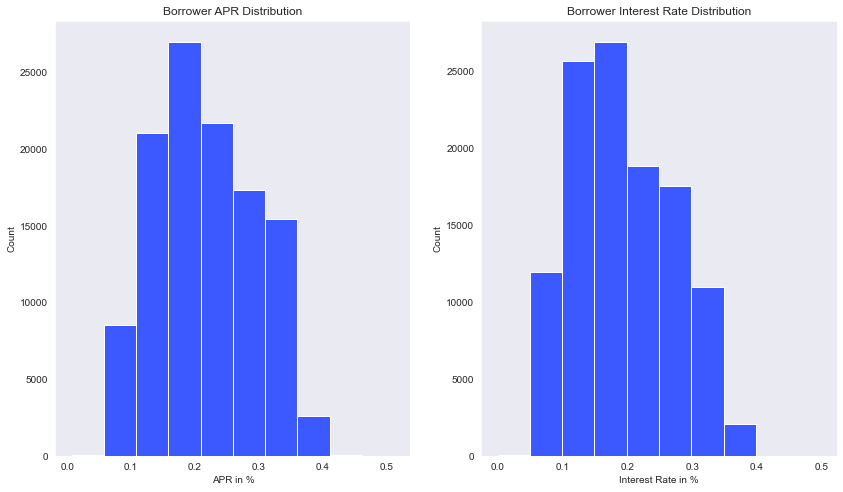

In [13]:
#subplots of loans APR and interest rate
plt.figure(figsize=[14, 8])

plt.subplot(1, 2, 1)
plt.hist(prosper_loans['BorrowerAPR'], color='#3C59FF', bins=10)
plt.xlabel('APR in %')
plt.ylabel('Count')
plt.title('Borrower APR Distribution')

plt.subplot(1, 2, 2)
plt.hist(prosper_loans['BorrowerRate'], color='#3C59FF', bins=10)
plt.xlabel('Interest Rate in %')
plt.ylabel('Count')
plt.title('Borrower Interest Rate Distribution')
plt.show();

 __Findings:__
- The a data is right skewed.
- The median APR and median interest rate are slightly lower than the average. The typical APR and interest rate is about 0.2%.
- A high density of borrowers have an APR of about 0.2% and interest rates of 0.18%
- This is followed by a density of borrowers with an APR of between 0.2% and 0.25% and interest rates between 0.1% and 0.15% 
- About 2 500 borrowers have APR's and interest rates above 0.35%.

__Distribution of Debt to Income (DTI) Ratio__

In [14]:
prosper_loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [15]:
#
prosper_loans.query('DebtToIncomeRatio > 1')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Year,Quarter
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,0.00,0.00,0.0,1.0,0,0,0.0,94,2013,Q1
226,2EA63382419173023274969,104542,2007-02-28 10:45:44.153000000,D,36,Completed,2009-07-07 00:00:00,0.11749,0.1000,0.0900,...,0.00,0.00,0.0,1.0,0,0,0.0,16,2007,Q1
368,00F033886616529869C3281,128819,2007-04-25 19:19:24.050000000,C,36,Completed,2007-06-19 00:00:00,0.20735,0.2000,0.1850,...,0.00,0.00,0.0,1.0,0,0,0.0,74,2007,Q2
419,2C71357856570789463BB05,781432,2013-05-16 19:43:43.153000000,NaN,36,Defaulted,2014-02-21 00:00:00,0.35356,0.3134,0.3034,...,3507.26,3507.26,0.0,1.0,0,0,0.0,50,2013,Q2
576,3C18338635952151669AA4C,124494,2007-04-16 17:44:06.780000000,AA,36,Completed,2007-06-28 00:00:00,0.10505,0.0935,0.0885,...,0.00,0.00,0.0,1.0,0,0,0.0,58,2007,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113387,DF323501487653892C93A36,485381,2010-11-22 17:23:22.623000000,NaN,36,Completed,2013-08-22 00:00:00,0.39153,0.3500,0.3400,...,0.00,0.00,0.0,1.0,0,0,0.0,17,2010,Q4
113407,F3703411198534084FE3FAC,274103,2008-01-31 10:27:02.483000000,C,36,Completed,2011-02-15 00:00:00,0.25163,0.2365,0.2265,...,0.00,0.00,0.0,1.0,0,0,0.0,23,2008,Q1
113486,DA1F3524408616742EDFE28,523860,2011-08-24 09:27:50.863000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,0.00,0.00,0.0,1.0,0,0,0.0,1,2011,Q3
113626,DFB433665897044581828F7,31681,2006-08-16 01:58:39.087000000,A,36,Completed,2009-07-21 00:00:00,0.17722,0.1700,0.1650,...,0.00,0.00,0.0,1.0,0,0,0.0,124,2006,Q3


In [16]:
#replace values with DTI of 10.01 with 1.01. Move to preliminary wrangling

prosper_loans['DebtToIncomeRatio'] = prosper_loans['DebtToIncomeRatio'].apply(lambda r: 1.01 if r > 1 else r)


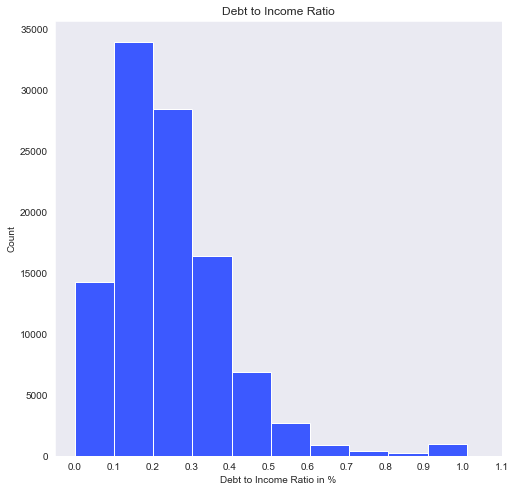

In [17]:
# plot of DebtToIncomeRatio
plt.figure(figsize=[8, 8])

plt.hist(prosper_loans['DebtToIncomeRatio'], color='#3C59FF')
plt.xticks(np.arange(0, 1.2, 0.1))
plt.xlabel('Debt to Income Ratio in %')
plt.ylabel('Count')
plt.title('Debt to Income Ratio');

 __Findings:__
- The data is right skewed or positively skewed and the typical borrower DTI is 20%.
- The average DTI is slightly larger than the median.
- A high density of borrowers have an DTI ratio between 10% and 20%
- This is followed by a density of borrowers with an DTI ratio between 20% and 30%

__Distribution of stated monthly income__

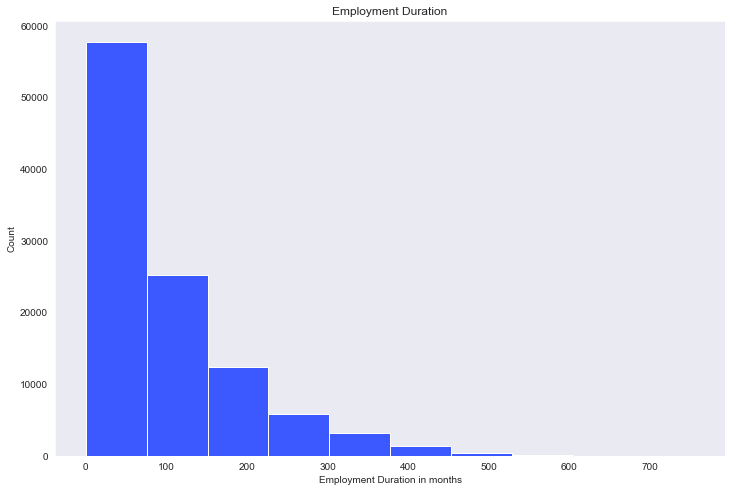

In [18]:
# plot of emloyment duration
plt.figure(figsize=[12, 8])

plt.hist(prosper_loans['EmploymentStatusDuration'],  color='#3C59FF')
plt.xlabel('Employment Duration in months')
plt.ylabel('Count')
plt.title('Employment Duration');


 __Findings:__
- The data is right skewed or positively skewed.
- Most borrowers have less than 100 months (8 years) employment duration.
- 

__Distribution of Loans with Verifiable Income__

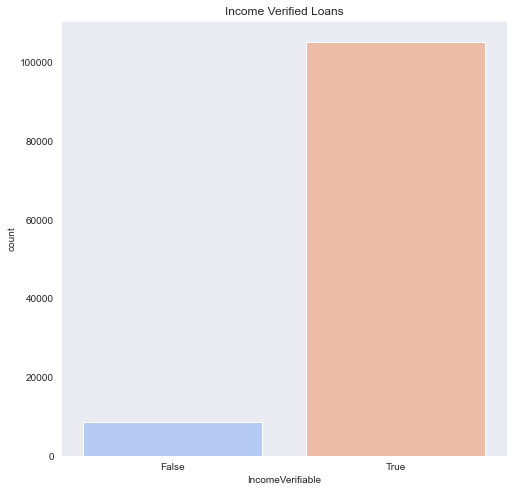

In [19]:
#bar chart to depict the number of loans by income verifiable

plt.figure(figsize=[8, 8])
sb.countplot(data=prosper_loans, x = 'IncomeVerifiable', palette='coolwarm');
plt.title('Income Verified Loans');

 __Findings:__
- There is a high frequency of loans that are income verified./Most of the loans are income verified
- More than 100 000 loans are income verified.

__Frequency of Occupations among borrowers__

In [20]:
type_order = prosper_loans['Occupation'].value_counts().head(10).index

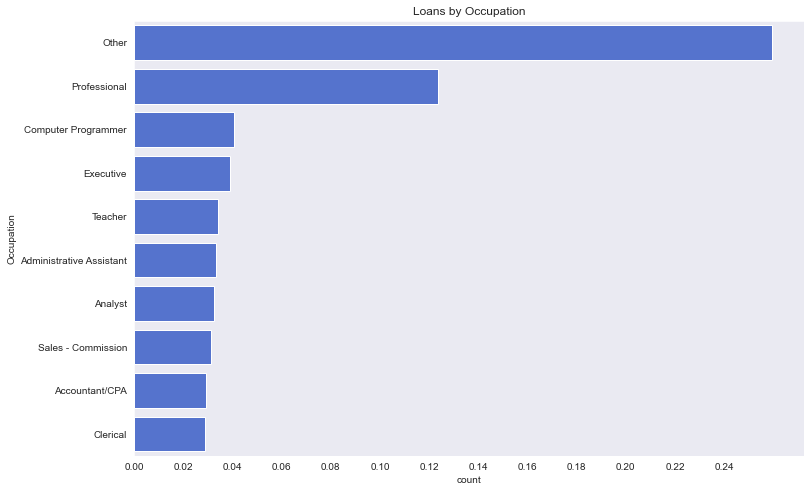

In [21]:
#relative frequency of loans by occupation.

n_loan_occ = prosper_loans['Occupation'].value_counts().sum()
max_loan_occ = prosper_loans['Occupation'].value_counts()[0]
max_title_prop = max_loan_occ/n_loan_occ

#create an array of evenly spaced proportions
prop_ticks1 = np.arange(0, max_title_prop, 0.02)
status_ticks1 = ['{:0.2f}'.format(v) for v in prop_ticks1]

plt.figure(figsize=[12, 8])
#plt.subplot(1, 3, 1)


sb.countplot(data=prosper_loans, y = 'Occupation', color='royalblue', order = type_order);
plt.xticks(prop_ticks1 * n_loan_occ, status_ticks1)
plt.title('Loans by Occupation');

plt.show();

 __Findings:__
- We can clearly see the top 5 most frequent occupations among the Prosper Loans
    - Other, Professional, Computer Programmer, Executive, Teacher
    

__Borrower type frequencies__

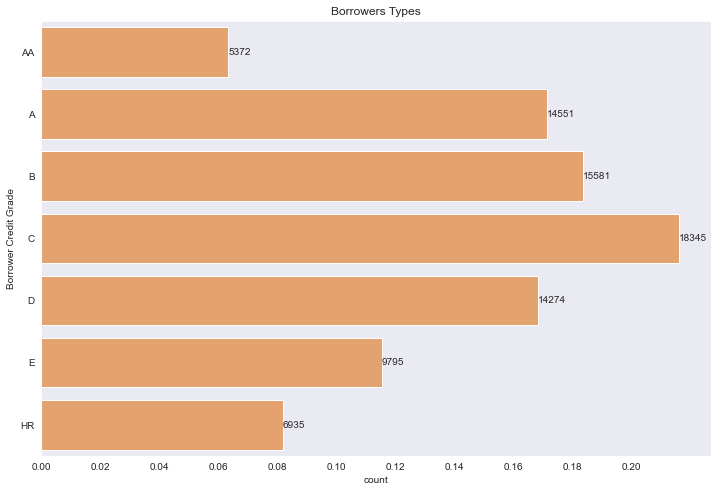

In [22]:
#relative frequency of loans by borrower type
n_loan_status = prosper_loans['ProsperRatingAlpha'].value_counts().sum()
max_loan_status = prosper_loans['ProsperRatingAlpha'].value_counts()[0]
max_loan_prop = max_loan_status/n_loan_status

#create an array of evenly spaced proportions
prop_ticks2 = np.arange(0, max_loan_prop, 0.02)
status_ticks2 = ['{:0.2f}'.format(v) for v in prop_ticks2]

plt.figure(figsize=[12, 8])
type_fig = sb.countplot(data=prosper_loans, y = 'ProsperRatingAlpha', color='#F89F5B', 
                        order = ['AA','A','B','C','D','E','HR']);
plt.xticks(prop_ticks2 * n_loan_status, status_ticks2)
plt.bar_label(type_fig.containers[0])
plt.ylabel('Borrower Credit Grade')
plt.title('Borrowers Types');

 __Findings:__
- Prosper loans has mostly C-Grade borrowers followed by B-Grade
- 17% are A-Grade, 16% are D-Grade and about 12% are E-Grade
- There is very few A+ and high risk (HR) borrowers with 6% and 8% respectively

__Frequency of Loan Status among borrowers__

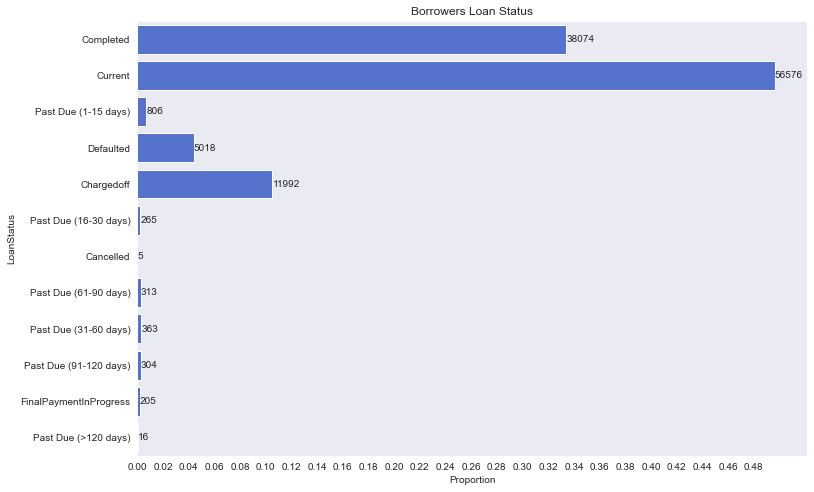

In [23]:
#relative frequency of loans by loan status
n_loan_past = prosper_loans['LoanStatus'].value_counts().sum()
max_loan_past = prosper_loans['LoanStatus'].value_counts()[0]
max_past_prop = max_loan_past/n_loan_past

#create an array of evenly spaced proportions
prop_ticks3 = np.arange(0, max_past_prop, 0.02)
status_ticks3 = ['{:0.2f}'.format(v) for v in prop_ticks3]

plt.figure(figsize=[12, 8])
loan_status_fig = sb.countplot(data=prosper_loans, y = 'LoanStatus', color='royalblue');
plt.xticks(prop_ticks3 * n_loan_past, status_ticks3)
plt.bar_label(loan_status_fig.containers[0])
plt.xlabel('Proportion')
plt.title('Borrowers Loan Status');

 __Findings:__
- About 4% of the loans are in default.

__Number of loans per year__

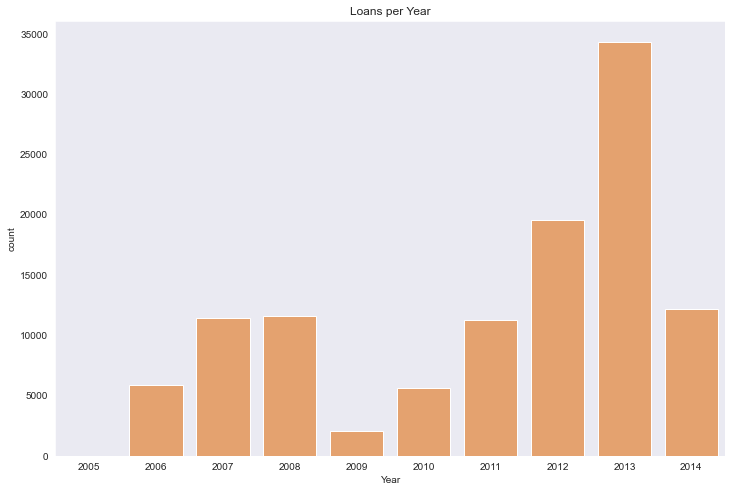

In [24]:
#bar chart to depict the number of loans per year

plt.figure(figsize=[12, 8])
sb.countplot(data=prosper_loans, x = 'Year', color='#F89F5B');
plt.title('Loans per Year');

 __Findings:__
- There is a high frequency of loans in 2013
- There were about 34 000 loans in 2013 and 19 000 in 2012
- 2009 had the least borrowers, below 2500

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- A high density of borrowers have an APR of about 0.2% and interest rates of 0.18%. This is followed by a density of borrowers with an APR of between 0.2% and 0.25% and interest rates between 0.1% and 0.15%. 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- A majority of the loans are income verified.

- DTI has an unusually large amount of 10.01. This is the cap amount for DTI for this dataset. There are 272 loans affected by this. So I decided to replace the cap amount of 1001 with 1.01 instead. A high density of borrowers have an DTI ratio between 10% and 20%. This is followed by a density of borrowers with an DTI ratio between 20% and 30%.

- Most borrowers have 8 years or less employment duration.

<a id='bi'></a>
## Bivariate Exploration

In this section, I investigate the correlation between pairs of variables focusing on APR and prosper Score.


In [25]:
prosper_matrix = prosper_loans.filter(['BorrowerAPR','LenderYield','BorrowerRate','EstimatedEffectiveYield','EstimatedLoss',
                                      'EstimatedReturn','EmploymentStatusDuration','DelinquenciesLast7Years','CurrentDelinquencies',
                                      'AmountDelinquent','DelinquenciesLast7Years', 'ProsperPaymentsLessThanOneMonthLate',
                                      'DebtToIncomeRatio','LoanOriginalAmount','MonthlyLoanPayment','Investors', 
                                      'TotalProsperLoans','LoanCurrentDaysDelinquent', 'OnTimeProsperPayments',
                                     'ProsperScore','ProsperRating (numeric)','Year', 'StatedMonthlyIncome','Term'])
#prosper_loans.loc[:,'CurrentDelinquencies':]
prosper_matrix = prosper_matrix.query('Year <= 2009')

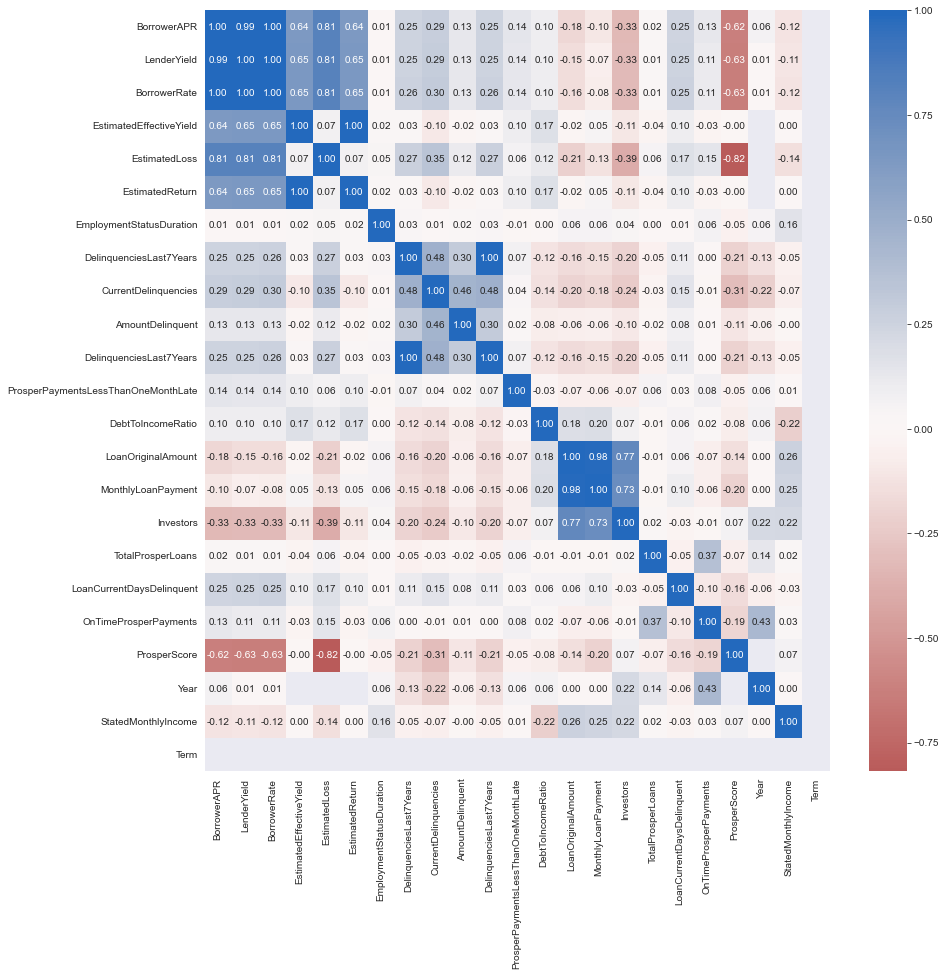

In [26]:
plt.figure(figsize=[14, 14])
sb.heatmap(prosper_matrix.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

Looking at the correlation matrix above, we see a strong positive correlation betwen APR and interest rate, which is expected as APR includes interest rate.
We aslo observe the negative correlation between prosper rating and APR.

There are more than 100 000 loan observations which will be difficult to interpret on a scatter plots as point overlap. So below we take a sample of 5000 loans and plot them on scatter plots.

In [27]:
#take a random sample of 1000 loans to reduce over - plotting
np.random.seed(5000)
sample = np.random.choice(prosper_loans.shape[0], 5000, replace = False)
loans_sample = prosper_loans.loc[sample]

###### Borrower APR vs Interest Rate

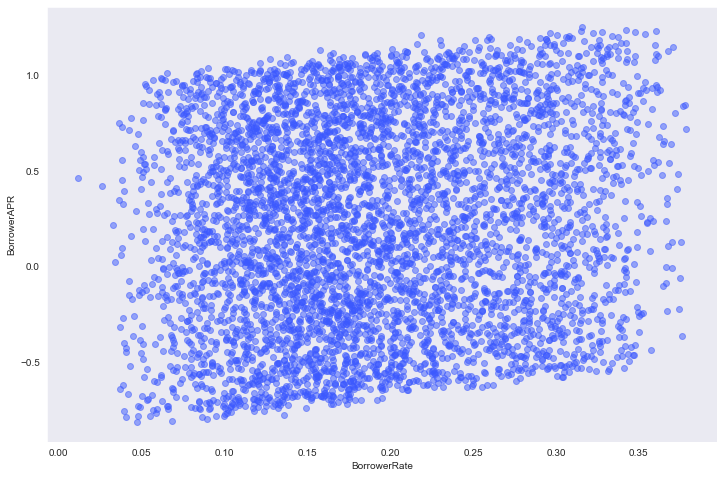

In [28]:
plt.figure(figsize=[12, 8])


sb.regplot(data = loans_sample, x = 'BorrowerRate', y = 'BorrowerAPR' , 
           x_jitter = 0.03, y_jitter = 0.9, scatter_kws = {'alpha' : 0.5}, color = '#3C59FF', fit_reg = False);


__Findings:__
   - Borrower APR and interest rate are positively correlated. When APR increases so does the interest rate.
   - There is an area of high frequency where APR is 0.1 and 0.4 and interest rate is between 0.05 and 0.35

##### Loan Original Amount and monthly loan payment

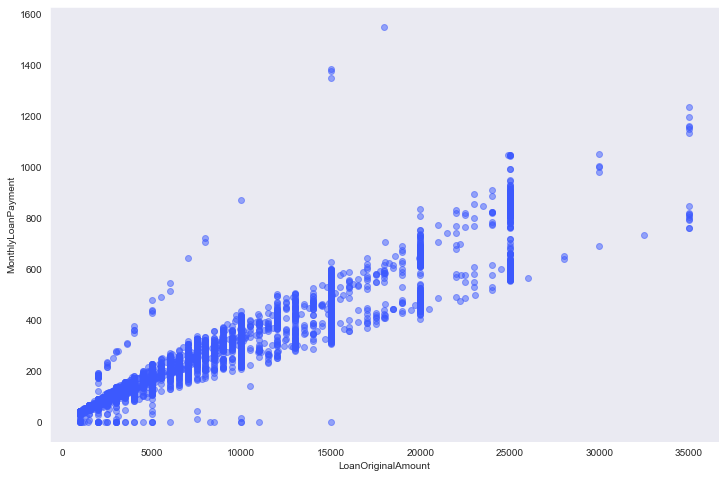

In [29]:
# plot of monthly loan payment and loan original amount
plt.figure(figsize=[12, 8])
sb.regplot(data = loans_sample, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment' , 
          x_jitter = 0.9, scatter_kws = {'alpha' : 0.5}, color = '#3C59FF', fit_reg = False)

plt.show()

__Findings:__
- There is a close positive correlation between these 2. The larger the loan original amount, the larger the monthly payment will be too.

###### Prosper score vs BorrowerAPR

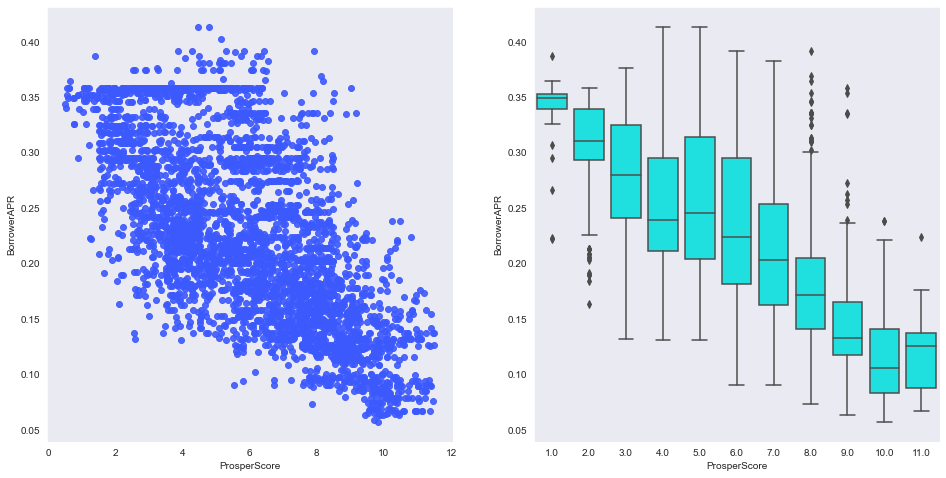

In [30]:
plt.figure(figsize=[16, 8])#we are observing

plt.subplot(1, 2, 1)
sb.regplot(data = loans_sample, y = 'BorrowerAPR', x = 'ProsperScore' ,
           x_jitter = 0.5, scatter_kws = {'alpha' : 0.9}, color = '#3C59FF', fit_reg = False)

plt.subplot(1, 2, 2)
sb.boxplot(data = loans_sample, x ='ProsperScore' , y = 'BorrowerAPR', color = 'cyan')

plt.show()

__Findings:__
- As the the prosper score gets higher, the median Annual % Rate lowers.
- There is outlier AP Rates with prosper scores 1 - 3 and 8 - 10. 
- There is more variation with borrowers a prosper score of 5.
- The box plot above indicates that loan prosper score does have an influence on Annual % Rate.

###### Loan Term vs Borrower APR

<AxesSubplot:xlabel='Term', ylabel='BorrowerAPR'>

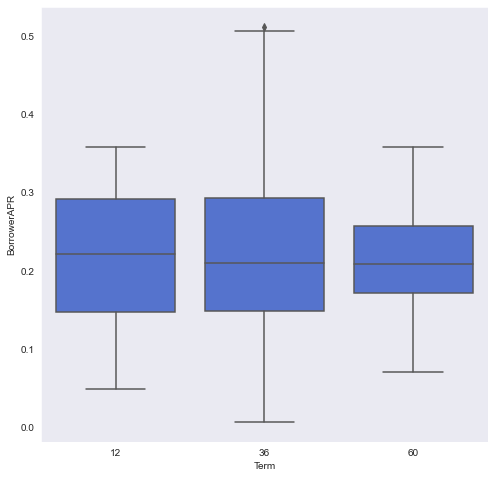

In [31]:
# loan tern vs APR box plot
plt.figure(figsize = [8,8])
sb.boxplot(data = prosper_loans, x ='Term' , y = 'BorrowerAPR', color = 'royalblue')

- Going from term 12 and 36 the APR does not seem to change. There is more variability with loans of terms 12, 36 than those of 60. The loan term does not seem to influence APR.
- Most loans are short-term and medium-term loans
- With term 60, there is a lower APR variablity. There is also an outlier of more than 0.5%

###### Prosper Score and employment duration

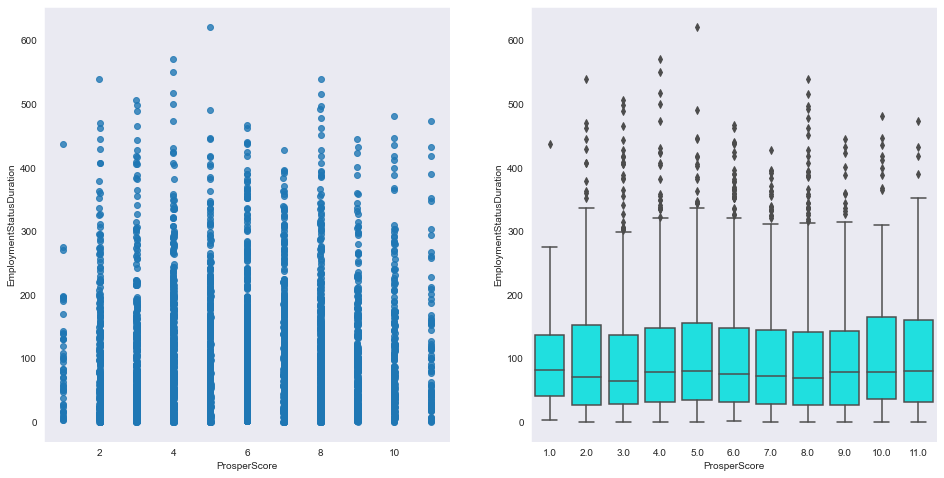

In [32]:
plt.figure(figsize=[16, 8])

plt.subplot(1, 2, 1)
sb.regplot(data = loans_sample, x = 'ProsperScore', 
           y = 'EmploymentStatusDuration' , x_jitter = 0.01, fit_reg = False)

plt.subplot(1, 2, 2)
sb.boxplot(data = loans_sample, y ='EmploymentStatusDuration' , x = 'ProsperScore', color='cyan')

plt.show()

I can see the over plotting of data in scatter plot above. The loans data from Prosper has a lot of points to plot so there is a high amount of overlap in points. So, the plot is not informative and it is hard to interpret. To resolve this the points are plotted with transparency and a jitter of +-0.4 range from the true values.


<AxesSubplot:xlabel='ProsperScore', ylabel='EmploymentStatusDuration'>

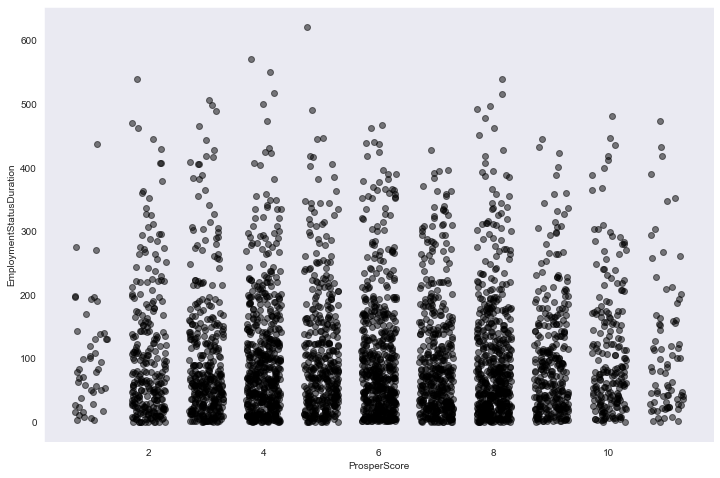

In [33]:
plt.figure(figsize=[12, 8])
sb.regplot(data = loans_sample, x = 'ProsperScore', 
           y = 'EmploymentStatusDuration' ,color = 'black', x_jitter = 0.3, 
           scatter_kws = {'alpha' : 0.5}, fit_reg = False)

From the plot below, there is clearly a high density of borrowers with working duration of less than 9 years (100 months). Area of high frequency has darker overlapping points from score 2 to 10. I also notice outlier points for all scores with less variability and employee duration above 300 which is 25 years. 
- So there are less borrowers with a lot of employee experience. 

######  Borrower APR by Credit Grade.

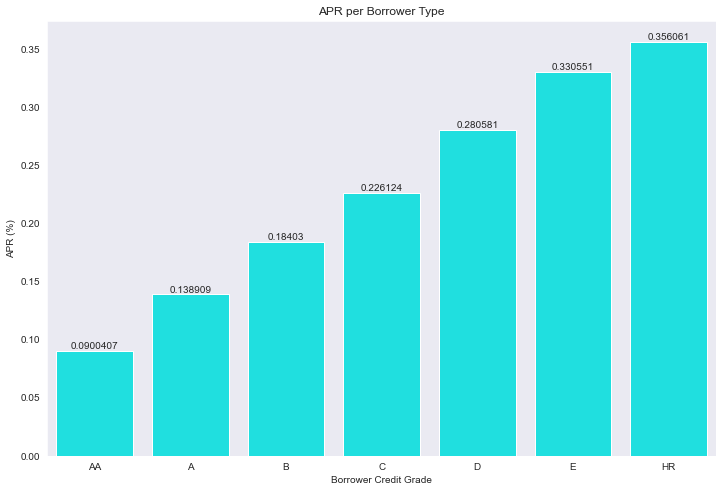

In [34]:
plt.figure(figsize=[12, 8])
fig2 = sb.barplot(data = prosper_loans, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', color = 'cyan', errwidth = 0, 
          order = ['AA','A','B','C','D','E','HR'])
for j in fig2.containers:

    fig2.bar_label(j,)

plt.xlabel('Borrower Credit Grade')
plt.ylabel('APR (%)')
plt.title('APR per Borrower Type')
plt.show()

High-risk borrowers have the highest APR's. Low-risk borrowers have the least APR's. The higher the borrower risk and the higher the APR. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong positive correlation betwen APR and interest rate, which is expected as APR includes interest rate. An interesting find is the observed negative correlation between prosper rating/score and APR. There is an influence that the prosper score has on Annual % Rate. As the the prosper score gets higher, the median Annual % Rate lowers. 

There is more variation with borrowers with a prosper score of 5.

There is outlier APR's with prosper scores 1 - 3 and 8 - 10. These are standout borrowers who have a low score and lower APR. Or another standout scenario of borrowers with high scores and higher APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is more variability with loans of terms 12, 36 than those of 60. The loan term does not seem to influence APR though.
Most loans are short-term and medium-term loans.

There is high density of borrowers with working duration of less than 9 years (100 months) with a score from 2 to 10. I also notice outlier points for all scores with less variability and employee duration above 300 months (25 years).There is less borrowers with a lot of employee experience.

*Outliers on Term and StatedMonthlyIncome??? Why???*

*What about LoanOriginalAmount and MonthlyLoanPayment???There is a close positive correlation between these 2. The larger the loan original amount, the larger the monthly payment will be too.*

<a id='multi'></a>
## Multivariate Exploration

Lastly, I further investigate APR, interest rate and Prosper Ratings by employment status, homeownership and the duration of the loan.

###### Borrower APR and interest rate by employment status

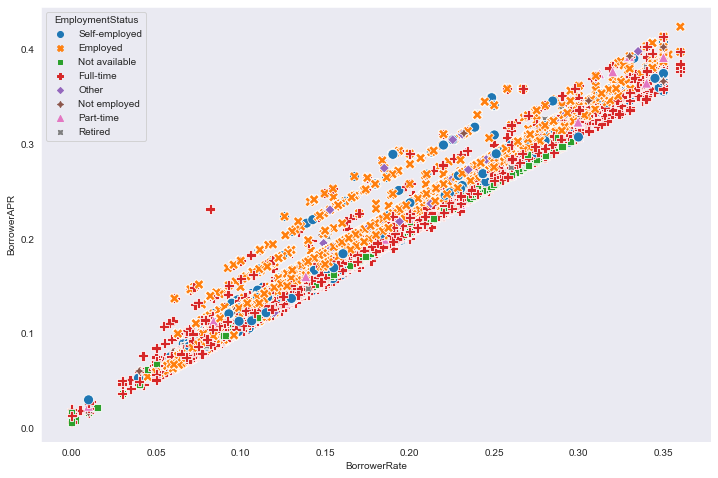

In [35]:
# plot of Borrower APR and interest rates by homeownership
plt.figure(figsize=[12, 8])
sb.scatterplot(data = prosper_loans,x = 'BorrowerRate', y = 'BorrowerAPR',
               x_jitter = 0.3,
               hue = 'EmploymentStatus', s=100, style = 'EmploymentStatus')
plt.show()

__Findings:__
- Part-time borrowers have the least variability in borrower rate and APR. Is this because they might be considered high risk?
- Borrowers with the most variability are employed and full-time as shown in orange and red respectively.

######  Borrower APR and Score by homeownership

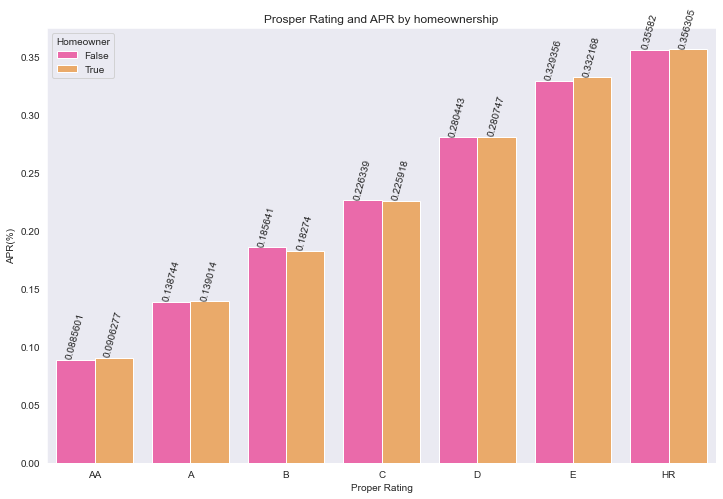

In [36]:
# plot of Borrower APR and Score by homeownership
plt.figure(figsize=[12, 8])
fig3 = sb.barplot(data = prosper_loans, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', errwidth = 0, hue = 'IsBorrowerHomeowner',
           order = ['AA','A','B','C','D','E','HR'], palette = 'spring')

for i in fig3.containers:
    fig3.bar_label(i, rotation = 75)

plt.title('Prosper Rating and APR by homeownership') 
plt.xlabel('Proper Rating')
plt.ylabel('APR(%)')
plt.legend(title='Homeowner')
plt.show()

__Findings:__ 
- Homeowners and non-homeowner seem to have the same APR accross all borrower types

######  Borrower APR and  Credit Grade by Term

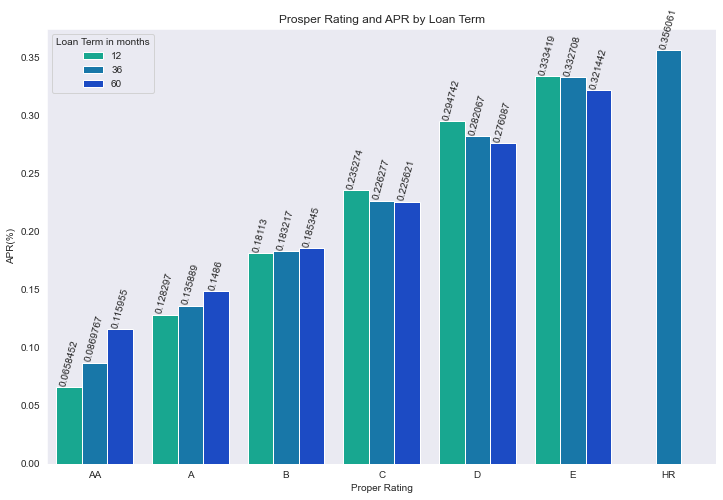

In [37]:
# plot of Borrower APR and Credit Grade by Term
plt.figure(figsize=[12, 8])
fig4 = sb.barplot(data = prosper_loans, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', errwidth = 0, hue = 'Term', 
           order = ['AA','A','B','C','D','E','HR'], palette = 'winter_r')

for i in fig4.containers:
    fig4.bar_label(i, rotation = 75)

plt.title('Prosper Rating and APR by Loan Term')
plt.xlabel('Proper Rating')
plt.ylabel('APR(%)')
plt.legend(title='Loan Term in months')
plt.show()

__Findings:__
- A+, A and B Grades(low-risk borrowers) have all their term loans at the lowest AP rates
- High-risk borrowers only have medium-term loans at a high interest rate.
- C, D and E-grade borrowers(medium-risk) have short-term loans at the higher AP rates. Short and medium term are at a higher AP rate than long-term loans.

######  Borrower Interest Rate trend 

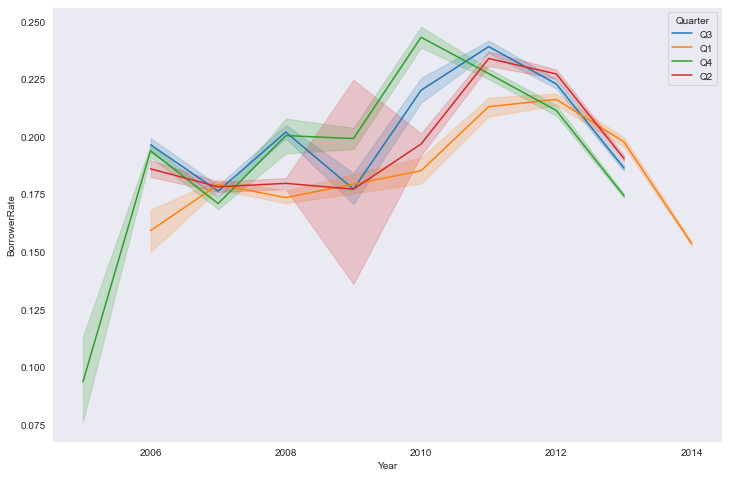

In [38]:
# lineplot of borrower interest rate per year
plt.figure(figsize=[12, 8])
sb.lineplot(data = prosper_loans, x = 'Year', y = 'BorrowerRate', hue = 'Quarter');

The interest rate was at less than 0.1% in 2005 and in 2014 was at 0.15%
   - Interest rates are at an all time high in Q4 2010 at about 0.25%
   - The lineplot shows a period of growth until a decline in 2006. Rates increases again in 2007 but seems to decline in 2008.
   - There is a pattern of interest rate increase followed by a decrease every year.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For further investigation, I added the feature IsBorrowerHomeowner. I am interested in seeing whether borrowers who are homeowners are targeted and whether APR and prosper scores will differ.

Then I added the loan term feature with duration of 12, 36 and 60 months to see the loan term influence on score and APR. 

### Were there any interesting or surprising interactions between features?

The bar plot showed that the Homeowners and non-homeowner seem to have the same APR accross all borrower types.

Prosper's high-risk borrowers do not seem to have flexibilty as they only have medium-term loans at higher APR's, otherwise low risk borrowers (AA, A or B grades) are given lower APR's regardless of loan term. Medium risk borrowers have short to medium term loans at higher APR than long-term loans' APR.

Also borrowers with the most APR variability are full-time employed, this further supports the majority of the borrowers's affordability.


<a id='close'></a>
## Conclusions

Prosper Loan Portfolio has disclosed low annual percentages and interest rates and most borrowers's income is verified and they have a low DTI ratio which are good indicators that most borrowers effectively manage to make their monthly repayments. Most borrowers are full time employed so Prosper is extending loans to borrowers who can afford to pay them.

From the negative correlaton of Prosper Score and APR, a potential borrower with a high score will get a low APR. Prosper has a low proportion of high risk borrowers. The higher the borrower risk there is reduced flexibilty in loan terms but still at high APR rates. In addition, the loan portfolio has a low default rate of 4%.

In [39]:
# Use this command if you are running this file in local
#ISSUE: Cannot run another slideshow until this notebook stops running
#!jupyter nbconvert Part_I_exploration_template.ipynb --to slides --post serve --no-input --no-prompt